# Text-to-Image and text-to-aninmation with stability.ai

Copyright 2023, Denis Rothman

Run text-to-image generation.

Then disconnect and retart the runtime the text-to-animation generation to avoid overlapping Stability AI packages.

In [ ]:
#Development access to delete when going into production
from google.colab import drive
drive.mount('/content/drive')

with open('drive/MyDrive/files/github.txt', 'r') as f:
    github_token = f.read().strip()

Mounted at /content/drive


# Installing the Stability SDK and cloning the modules

In [1]:
!pip install stability-sdk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.1/117.1 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.8/409.8 kB 11.2 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.60.0
    Uninstalling grpcio-1.60.0:
      Successfully uninstalled grpcio-1.60.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.14.0 requires protobuf<4.21,>=3.20.3, but you have protobuf 4.21.12 which is incompatible.


In [2]:
!git clone --recurse-submodules https://github.com/Stability-AI/stability-sdk

Cloning into 'stability-sdk'...
remote: Enumerating objects: 3255, done.
remote: Counting objects: 100% (360/360), done.
remote: Compressing objects: 100% (131/131), done.
remote: Total 3255 (delta 207), reused 341 (delta 196), pack-reused 2895
Receiving objects: 100% (3255/3255), 55.01 MiB | 16.98 MiB/s, done.
Resolving deltas: 100% (1904/1904), done.
Submodule 'api-interfaces' (https://github.com/stability-ai/api-interfaces) registered for path 'src/stability_sdk/interfaces'
Cloning into '/content/stability-sdk/src/stability_sdk/interfaces'...
remote: Enumerating objects: 4872, done.        
remote: Counting objects: 100% (2106/2106), done.        
remote: Compressing objects: 100% (552/552), done.        
remote: Total 4872 (delta 1554), reused 1848 (delta 1389), pack-reused 2766        
Receiving objects: 100% (4872/4872), 5.22 MiB | 22.82 MiB/s, done.
Resolving deltas: 100% (3482/3482), done.
Submodule path 'src/stability_sdk/interfaces': checked out '5e08d2d47480a738bdeda8be89165

In [3]:
!export STABILITY_HOST=grpc.stability.ai:443
#!export STABILITY_KEY=[YOUR_API_KEY] #you must have a Stability key

In [ ]:
#!export STABILITY_KEY="sk-qdYhbLFonbS6fzb7yAqYWOL6e1IfePC5GMIRVISlfq18SkAx"

In [4]:
!python -m stability_sdk generate "A stunning spaceship with stars as lights and fantastic buildings inside ."

Please enter your API key from dreamstudio.ai or set the STABILITY_KEY environment variable to skip this prompt.
Enter your Stability API key: 


In [5]:
import os
from IPython.display import display, Image

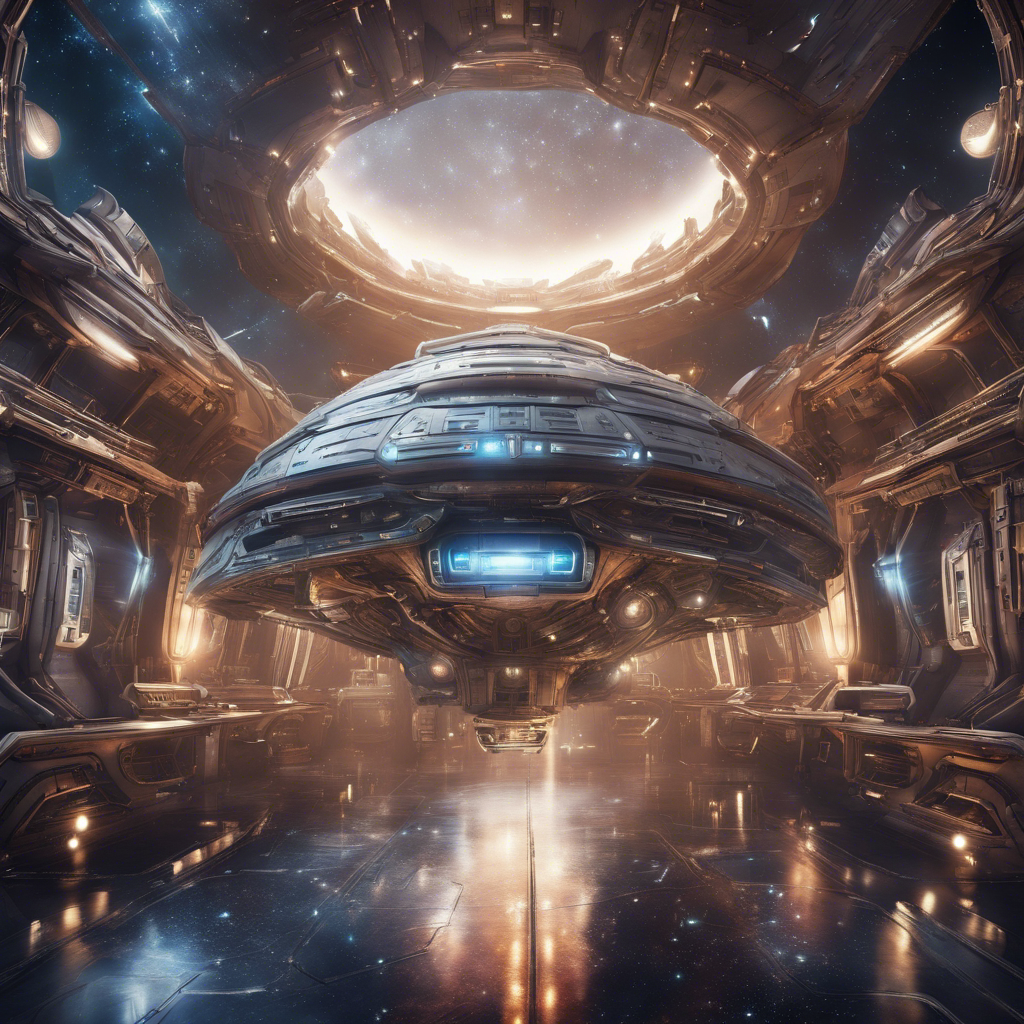

In [6]:
for file_name in os.listdir('/content'):
    if file_name.endswith('.png'):
        display(Image(filename=os.path.join('/content', file_name)))

Example of  "A stunning spaceship with stars as lights and fantastic buildings inside"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1770k  100 1770k    0     0  3712k      0 --:--:-- --:--:-- --:--:-- 3711k


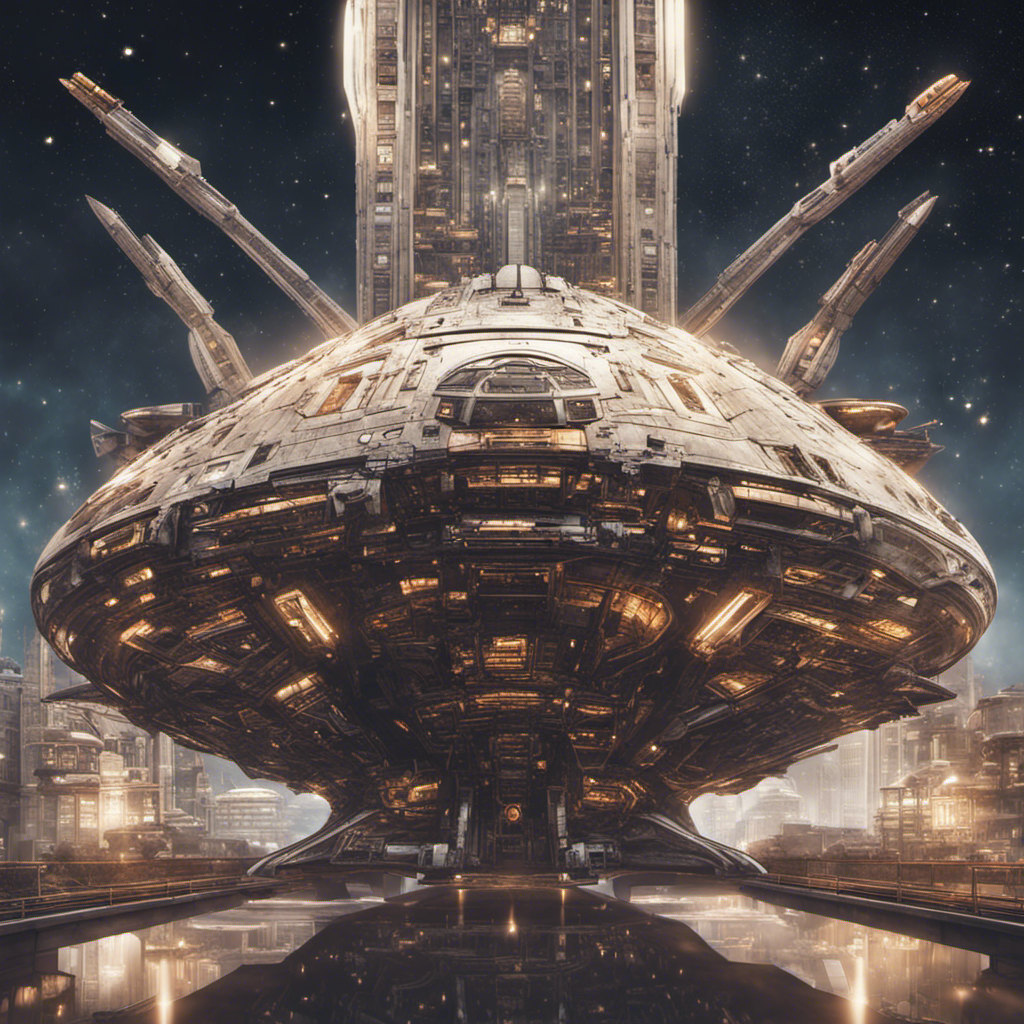

In [ ]:
#Development access to delete when going into production
!curl -H 'Authorization: token {github_token}' -L https://raw.githubusercontent.com/Denis2054/Transformers_3rd_Edition/master/Chapter17/Stability01.png --output "Stability01.png"
from PIL import Image
# Define the path of your image
image_path = "/content/Stability01.png"
# Open the image
image = Image.open(image_path)
image

## Chaining the output of the TimeSformer to the input Stable Diffusion model

This is a label-to-image task.

Uncommment the 4 following cells that generates an image to represent the output of the TimeSformer when we implement the model in the *Video-to-text with TimeSformer* section of this chapter.


Then display the image of the label in the following cell.

In [ ]:
#!python -m stability_sdk generate "eating sphaghetti"

In [ ]:
'''
import os
from IPython.display import display, Image
for file_name in os.listdir('/content'):
    if file_name.endswith('.png'):
        display(Image(filename=os.path.join('/content', file_name)))
'''

Label-to-image

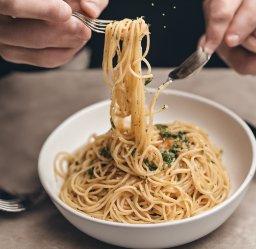

a more creative label that could be an expanded version of the label by ChatGPT or another LLM model.

In [ ]:
#!python -m stability_sdk generate "eating sphaghetti on a merry-go-round"

In [ ]:
'''
from IPython.display import display, Image
for file_name in os.listdir('/content'):
    if file_name.endswith('.png'):
        display(Image(filename=os.path.join('/content', file_name)))
'''

A more creative label-to-image

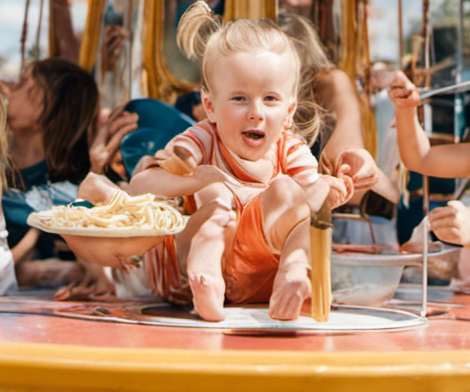

# Text-to-animation

## Disconnect, delete and restart your runtime before continuing to avoid overlapping Stability AI installations.

In [ ]:
!pip install "stability_sdk[anim_ui]"   # Install the Animation SDK

In [ ]:
!git clone --recurse-submodules https://github.com/Stability-AI/stability-sdk

Enter your API Key

In [ ]:
from stability_sdk import api

STABILITY_HOST = "grpc.stability.ai:443"
STABILITY_KEY = [YOUR_API_KEY]
context = api.Context(STABILITY_HOST, STABILITY_KEY)

In [ ]:
from stability_sdk.animation import AnimationArgs, Animator

# Configure the animation
args = AnimationArgs()
args.interpolate_prompts = True
args.locked_seed = True
args.max_frames = 48
args.seed = 42
args.strength_curve = "0:(0)"
args.diffusion_cadence_curve = "0:(4)"
args.cadence_interp = "film"

animation_prompts = {
    0: "a photo of a fantastic spaceship",
    24: "a photo of a fantastic lunar landing module",
}
negative_prompt = ""

# Create Animator object to orchestrate the rendering
animator = Animator(
    api_context=context,
    animation_prompts=animation_prompts,
    negative_prompt=negative_prompt,
    args=args
)

# Render each frame of animation
for idx, frame in enumerate(animator.render()):
    frame.save(f"frame_{idx:05d}.png")

In [ ]:
from stability_sdk.utils import create_video_from_frames
from tqdm import tqdm

animator = Animator(
    api_context=api.Context(STABILITY_HOST, STABILITY_KEY),
    animation_prompts=animation_prompts,
    negative_prompt=negative_prompt,
    args=args,
    out_dir="video_01"
)

for _ in tqdm(animator.render(), total=args.max_frames):
    pass

create_video_from_frames(animator.out_dir, "video.mp4", fps=24)

100%|██████████| 48/48 [01:25<00:00,  1.78s/it]


In [ ]:
from IPython.display import display, Video

display(Video("/content/video.mp4",embed=True))

Example of a video:    
    0: "a photo of a fantastic spaceship",
    24: "a photo of a fantastic lunar landing module",

The video can be downloaded at:

https://github.com/Denis2054/Transformers-for-NLP-and-Computer-Vision-3rd-Edition/blob/main/Chapter17/Stability_02.mp4
